Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Example Tutorial for Australian Domestic Tourism
[1] https://nixtlaverse.nixtla.io/hierarchicalforecast/examples/australiandomestictourism.html


For Non-Negative Reconcilitation.
[3] https://nixtlaverse.nixtla.io/hierarchicalforecast/examples/nonnegativereconciliation.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import darts
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values
from darts.models.forecasting.arima import ARIMA
from darts.utils.statistics import check_seasonality, extract_trend_and_seasonality, plot_acf


import numpy as np
import pandas as pd

import datetime

from statsmodels.tsa.seasonal import seasonal_decompose, STL , MSTL

import os
from pathlib import Path


pd.set_option('display.max_columns', 500)


Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/user/virtualenvs/lh_desafio_ds_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from data_processing import resample_time_series, fill_timeseries_gaps, fill_missing_dates

In [3]:
curr_folder_path = Path(os.path.abspath(""))
base_path = curr_folder_path.parent.absolute()
data_path = os.path.join(base_path, 'data')

df_ds1 = pd.read_csv(os.path.join(data_path, 'dim_ds_new.csv'))

df_ds1.sample(3)

,SALES_ORDER_ID,ACCOUNT_NUMBER,BILL_TO_ADDRESS_ID,CREDITCARD_ID,CUSTOMER_ID,CURRENCY_RATE_ID,DUE_DATE,FREIGHT,ONLINE_ORDER_FLAG,ORDER_DATE,SALES_PERSON_ID,SHIP_DATE,SHIP_TO_ADDRESS_ID,SHIP_METHOD_ID,SALES_STATUS,SUBTOTAL,TERRITORY_ID,TAXAMT,TOTAL_DUE,PRODUCT_ID,SALES_ORDER_DETAIL_ID,ORDER_QTY,SPECIAL_OFFER_ID,UNIT_PRICE,UNIT_PRICE_DISCOUNT,PRODUCT_CLASS,PRODUCT_COLOR,DAY_TO_MANUFACTURE,FINISHED_GOODS_FLAG,LIST_PRICE,PRODUCT_NAME,PRODUCT_LINE,PRODUCT_MODEL_ID,PRODUCT_NUMBER,PRODUCT_SUBCATEGORY_ID,SELL_END_DATE,SELL_START_DATE,PRODUCT_SIZE,SIZE_UNIT_MEASURE_CODE,STANDARD_COST,PRODUCT_STYLE,PRODUCT_WEIGHT,WEIGHT_UNIT_MEASURE_CODE,PERSON_ID,STORE_ID,BUSINESS_ENTITY_ID,STORE_NAME,TERRITORY_NAME,COUNTRY_REGION_CODE,TERRITORY_GROUP,SALES_YTD,SALES_LAST_YEAR,COST_YTD,COST_LAST_YEAR,STATEPROVINCE_ID,STATEPROVINCE_NAME,STATEPROVINCE_CODE,COUNTRYREGION_CODE,IS_PROVINCE_FLAG,COUNTRY_REGION_NAME,ADDRESS_ID,ADDRESSLINE_FULL,CITY,POSTALCODE
108238,57164,10-4020-000540,814,5690.0,30009,NaN,2013-10-12 00:00:00.000,458.4441,False,2013-09-30,277.0,2013-10-07,814,5,5,15310.3200,2,1467.0210,17235.7851,883,63004,7,1,32.394,0.0,NaN,Yellow,0,True,53.99,"Short-Sleeve Classic Jersey, L",S,32,SJ-0194-L,21,NaN,2013-05-30 00:00:00.000,L,NaN,41.5723,U,NaN,NaN,1449,1450.0,1450.0,Guaranteed Sales and Service,Northeast,US,group,2.402177e+06,3.607149e+06,0,0,55,Ohio,OH,US,False,United States,814,"Buckeye Factory Shops, Buckeye Factory Shops",Burbank,44214
31711,55474,10-4030-014502,19651,4317.0,14502,9436.0,2013-09-13 00:00:00.000,1.7498,True,2013-09-01,NaN,2013-09-08,19651,1,5,69.9900,6,5.5992,77.3390,867,56551,1,1,69.990,0.0,NaN,Black,0,True,69.99,"Women's Mountain Shorts, S",M,37,SH-W890-S,22,NaN,2013-05-30 00:00:00.000,S,NaN,26.1763,W,NaN,NaN,10590,NaN,NaN,NaN,Canada,CA,group,6.771829e+06,5.693989e+06,0,0,7,British Columbia,BC,CA,False,Canada,19651,"1686 Terranova Drive, 1686 Terranova Drive",Metchosin,V9
8115,47708,10-4020-000496,526,14928.0,30048,5399.0,2012-09-11 00:00:00.000,2012.9182,False,2012-08-30,289.0,2012-09-06,526,5,5,66707.6253,6,6441.3383,75161.8818,862,19212,9,1,22.794,0.0,NaN,Black,0,True,37.99,"Full-Finger Gloves, M",M,3,GL-F110-M,20,2013-05-29 00:00:00.000,2012-05-30 00:00:00.000,M,NaN,15.6709,U,NaN,NaN,1839,1840.0,1840.0,Top Sports Supply,Canada,CA,group,6.771829e+06,5.693989e+06,0,0,1,Alberta,AB,CA,False,Canada,526,"251420a 170th Street, 251420a 170th Street",Edmonton,T5


## <p style="background-color:#56BBD1;font-family:newtimeroman;color:#2E3035;font-size:150%;text-align:center;border-radius:10px 10px;">Data Science Task #1 - Sazonalidade</p>

Aponte se há ou não a presença de sazonalidade em algum produto de sua escolha.

- We will include e-Commerce.
- We will only select products which are sold relatively well in stores


In [4]:
TIME_COL = "ORDER_DATE"
TARGET_COLS = "ORDER_QTY"
FREQ = 'MS'


In [98]:

# Select only relevant columns
df = df_ds1[['PRODUCT_NAME', TARGET_COLS, TIME_COL, 'STORE_NAME']]

# Select Products, Stores or Store/Product combination
unique_combinations = df.groupby(['STORE_NAME', 'PRODUCT_NAME']).size()
filtered_combinations = unique_combinations[unique_combinations > 7].index
df = df[df.set_index(['STORE_NAME', 'PRODUCT_NAME']).index.isin(filtered_combinations)]

# Datetime casting
df[TIME_COL] = pd.to_datetime(df[TIME_COL])

# Filling empty stores
df['STORE_NAME'] = df['STORE_NAME'].fillna('E-commerce')

# Fill missing dates
start_date = df[TIME_COL].min()
end_date = df[TIME_COL].max()
df = fill_timeseries_gaps(df, time_col=TIME_COL, target_cols=TARGET_COLS, start_date=start_date, end_date=end_date)

df


,ORDER_DATE,PRODUCT_NAME,STORE_NAME,ORDER_QTY
0,2011-05-31,AWC Logo Cap,Advanced Bike Components,0.0
1,2011-06-01,AWC Logo Cap,Advanced Bike Components,0.0
2,2011-06-02,AWC Logo Cap,Advanced Bike Components,0.0
3,2011-06-03,AWC Logo Cap,Advanced Bike Components,0.0
4,2011-06-04,AWC Logo Cap,Advanced Bike Components,0.0
...,...,...,...,...
838674,2014-04-27,"Sport-100 Helmet, Red",Wheelsets Storehouse,0.0
838675,2014-04-28,"Sport-100 Helmet, Red",Wheelsets Storehouse,0.0
838676,2014-04-29,"Sport-100 Helmet, Red",Wheelsets Storehouse,0.0
838677,2014-04-30,"Sport-100 Helmet, Red",Wheelsets Storehouse,0.0


#### <p style="background-color:#56BBD1;font-family:newtimeroman;color:#2E3035;font-size:150%;text-align:center;border-radius:10px 10px;">Produto: Sport-100 Helmet, Red</p>

#### For practical purposes, the function check_seasonality from Darts will be used. Not only does it check in a binary way if the timeseries is seasonal or not, but it also outputs the period on which the seasonality have been detected.

Under the hood, it applies the Auto Correlation Function (ACF) function and finds the local maxima. Then, it performs significante test (using the Bartlett formula) and stopts at first admissible value. This can be seen in this piece of code from its documentation:

```
for candidate in candidates:
    stat = _bartlett_formula(r, candidate - 1, len(ts))
    if r[candidate - 1] > stat * band_upper:
        return True, candidate
return False, 0
```

Source: https://unit8co.github.io/darts/_modules/darts/utils/statistics.html#check_seasonality


#### As the test below shows, the product "Sport-100 Helmet, Red" appears to be seasonal not only when aggregated by store, but also individually in all stores.


Product Sport-100 Helmet, Red have seasonality in store aggregate, with a period of 31 days


<Axes: xlabel='ORDER_DATE'>

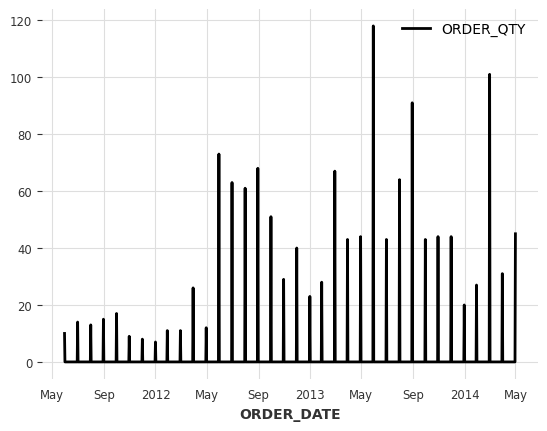

In [96]:
product = 'Sport-100 Helmet, Red'
df_product = df[df['PRODUCT_NAME'] == product]

agg_store_df = (
    df_product
    .drop(columns=['PRODUCT_NAME', 'STORE_NAME'])
    .groupby(TIME_COL)
    .sum()
).reset_index()

ts_agg = TimeSeries.from_dataframe(agg_store_df, time_col=TIME_COL, value_cols=TARGET_COLS)
seasonality_results = check_seasonality(ts_agg, max_lag=370)

if seasonality_results[0]:
    p = seasonality_results[1]
    print(f"Product {product} have seasonality in store aggregate, with a period of {p} days")
else:
    print(f"Product {product} have NO seasonality in store aggregate")

ts_agg.plot()

In [97]:

for store in df_product['STORE_NAME'].unique():
    # Filter data for current store
    store_data = (
        df_product[df_product['STORE_NAME'] == store]
        .drop(columns=['PRODUCT_NAME', 'STORE_NAME'])
        .groupby(TIME_COL)
        .sum()
    ).reset_index()

    # Create time series object
    ts_store = TimeSeries.from_dataframe(
        store_data, 
        time_col=TIME_COL, 
        value_cols=TARGET_COLS,
    )
    
    # Check seasonality
    seasonality_results = check_seasonality(ts_store, max_lag=370)
    if seasonality_results[0]:
        p = seasonality_results[1]
        print(f"Product {product} have seasonality in store {store}, with a period of {p} days")
    else:
        print(f"Product {product} have NO seasonality in store {store}")

Product Sport-100 Helmet, Red have seasonality in store Advanced Bike Components, with a period of 92 days
Product Sport-100 Helmet, Red have seasonality in store Better Bike Shop, with a period of 92 days
Product Sport-100 Helmet, Red have seasonality in store Bike Dealers Association, with a period of 91 days
Product Sport-100 Helmet, Red have seasonality in store Citywide Service and Repair, with a period of 92 days
Product Sport-100 Helmet, Red have seasonality in store Eastside Department Store, with a period of 91 days
Product Sport-100 Helmet, Red have seasonality in store Exhilarating Cycles, with a period of 92 days
Product Sport-100 Helmet, Red have seasonality in store Fashionable Department Stores, with a period of 89 days
Product Sport-100 Helmet, Red have seasonality in store Futuristic Sport Distributors, with a period of 92 days
Product Sport-100 Helmet, Red have seasonality in store Larger Cycle Shop, with a period of 92 days
Product Sport-100 Helmet, Red have seasonal